In [13]:
!pip install seaborn





In [18]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect("C:/Users/abina/Documents/GitHub/UMD-INST627-Fall2024/data/nba.sqlite")

Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)

Intro: This analysis focuses on understanding how the seasons (2019-2022) impacted home and away performance metrics, particularly win percentages, free throw shooting accuracy, and overall point differences. By comparing the data from the seasons with pre-pandemic norms, we can gauge how much the shift in the basketball landscape affected traditional performance trends.


C:\Users\abina\AppData\Local\Temp\ipykernel_19148\3142331539.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})


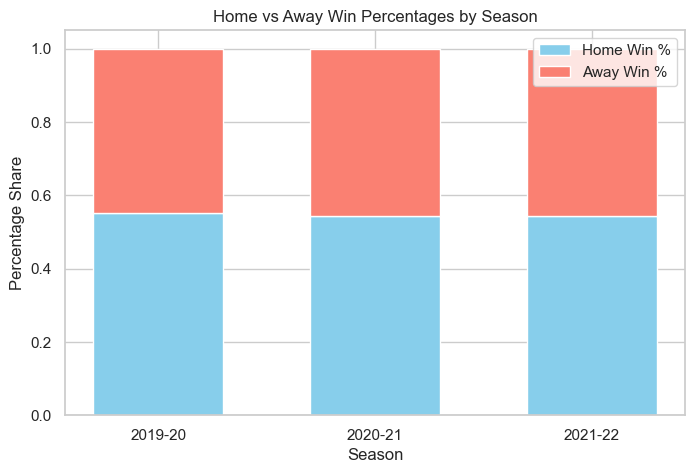

In [60]:

# Question 1 plot 1 

# Seasons
covid_wl_all = pd.read_sql_query(
    "SELECT season_id, wl_home, wl_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)
covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})

# Group data by season and calculate mean win percentages
covid_wl_all_group = covid_wl_all.groupby('season_id').agg({'wl_home': 'mean', 'wl_away': 'mean'}).reset_index()
covid_wl_all_group.columns = ['Season', 'Home Win %', 'Away Win %']

# Stacked bar plot
covid_wl_all_group['Total %'] = covid_wl_all_group['Home Win %'] + covid_wl_all_group['Away Win %']
covid_wl_all_group['Home Win % Share'] = covid_wl_all_group['Home Win %'] / covid_wl_all_group['Total %']
covid_wl_all_group['Away Win % Share'] = covid_wl_all_group['Away Win %'] / covid_wl_all_group['Total %']

# Plot stacked bar chart
plt.figure(figsize=(8, 5))
bar_width = 0.6
seasons = ['2019-20', '2020-21', '2021-22']
home_shares = covid_wl_all_group['Home Win % Share']
away_shares = covid_wl_all_group['Away Win % Share']

plt.bar(seasons, home_shares, label='Home Win %', color='skyblue', width=bar_width)
plt.bar(seasons, away_shares, bottom=home_shares, label='Away Win %', color='salmon', width=bar_width)

# Labels and title
plt.title("Home vs Away Win Percentages by Season", fontsize=12)
plt.ylabel("Percentage Share")
plt.xlabel("Season")
plt.legend()
plt.show()



Rising Action: The first plot investigates the difference in win percentages for home and away teams across the three pandemic seasons. A stacked bar plot highlights the share of wins for both home and away teams for the 2019-20, 2020-21, and 2021-22 seasons.
It becomes clear that the 2020-21 season, marked by strict pandemic restrictions, saw the most notable shift, with home teams losing some of their usual advantage. The 2019-20 season, though slightly impacted, showed a more balanced split, while the 2021-22 season reflected a partial recovery as teams adjusted to the new environment.

C:\Users\abina\AppData\Local\Temp\ipykernel_19148\2802868854.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})


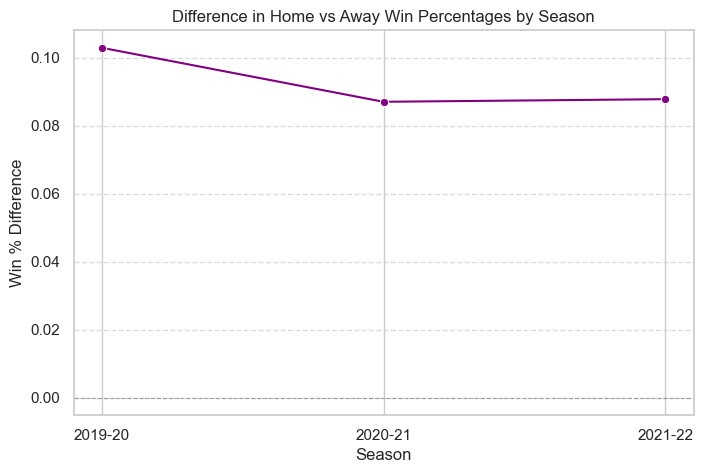

In [59]:
# Question 1 plot 2
# Query for relevant seasons
covid_wl_all = pd.read_sql_query(
    "SELECT season_id, wl_home, wl_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)
covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})

# Group data by season and calculate mean win percentages
covid_wl_all_group = covid_wl_all.groupby('season_id').agg({'wl_home': 'mean', 'wl_away': 'mean'}).reset_index()
covid_wl_all_group.columns = ['Season', 'Home Win %', 'Away Win %']

# Calculate the difference in win percentages
covid_wl_all_group['Win % Difference'] = covid_wl_all_group['Home Win %'] - covid_wl_all_group['Away Win %']

# Plot the difference as a line plot
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=covid_wl_all_group,
    x=['2019-20', '2020-21', '2021-22'],
    y='Win % Difference',
    marker='o',
    color='purple'
)

# Add labels and title
plt.title("Difference in Home vs Away Win Percentages by Season", fontsize=12)
plt.ylabel("Win % Difference")
plt.xlabel("Season")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Climax : The significant divergence in home and away win percentages becomes evident. While the 2019-20 season displayed a slight shift due to the early pandemic disruptions, it was the 2020-21 season that witnessed the most notable drop in home-court advantage. Home teams, traditionally enjoying a consistent edge, struggled to maintain their dominance, as factors like empty arenas and altered routines blurred the advantage they once held. This moment underscores a critical shift in the very concept of home-court advantage, as external variables influenced team performance in unexpected ways.

Falling Action:  The fluctuations observed, especially in the 2020-21 season, began to level out in the 2021-22 season, particularly in terms of win percentages and free throw performance. However, some inconsistencies in home team performances still persist, with variations in the points difference and free throw percentage gap across seasons.

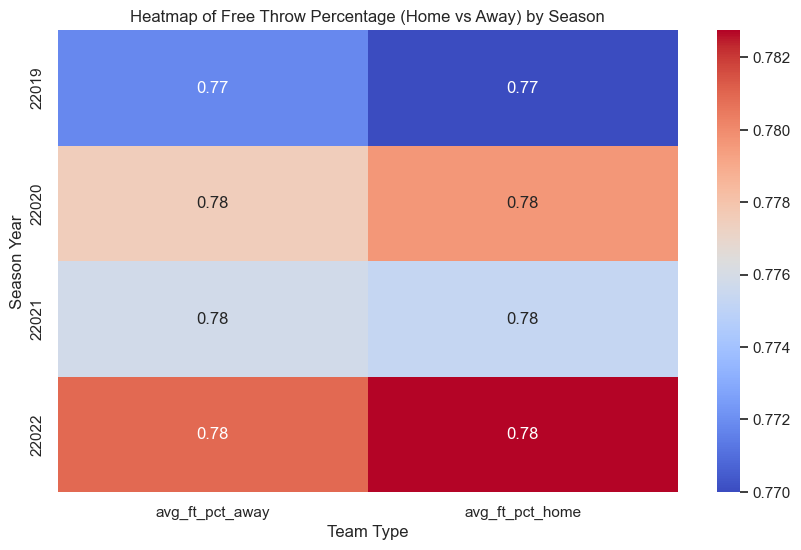

In [46]:
#Question 1 plot 3
pivot_df = result_df.pivot_table(values=['avg_ft_pct_home', 'avg_ft_pct_away'], index='season_year')

# Plot the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f')

# Adding labels and title
plt.title('Heatmap of Free Throw Percentage (Home vs Away) by Season')
plt.xlabel('Team Type')
plt.ylabel('Season Year')
plt.show()



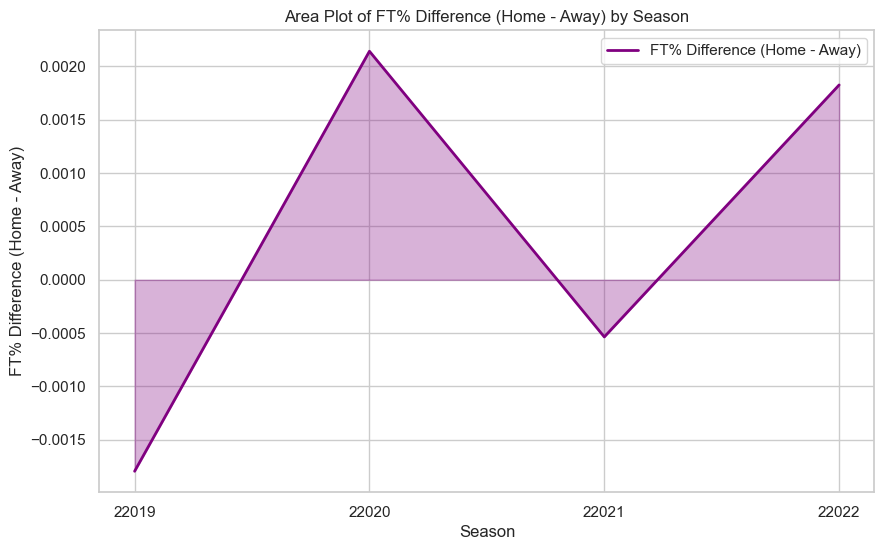

In [49]:
#Question 1 plot 4
# Ensure 'ft_diff' column exists and plot the area plot
result_df['ft_diff'] = result_df['avg_ft_pct_home'] - result_df['avg_ft_pct_away']

if 'ft_diff' in result_df.columns:
    plt.figure(figsize=(10, 6))

    # Area plot for FT% difference (Home - Away)
    sns.lineplot(x='season_year', y='ft_diff', data=result_df, label='FT% Difference (Home - Away)', color='purple', linewidth=2)
    plt.fill_between(result_df['season_year'], result_df['ft_diff'], color='purple', alpha=0.3)

    # Adding labels, title, and grid
    plt.xlabel('Season')
    plt.ylabel('FT% Difference (Home - Away)')
    plt.title('Area Plot of FT% Difference (Home - Away) by Season')
    plt.grid(True)

    plt.show()
else:
    print("ft_diff column is not available in the dataframe.")




Concluion: In conclusion, the analysis of home vs away performance during the seasons reveals notable differences in win percentages, free throw statistics, and points scored. The 2020-21 season displayed significant deviations from the norm, likely due to unique external factors. However, by the 2021-22 season, these discrepancies started to normalize, pointing toward a return to more consistent home-court advantages in areas like win percentages and points scored, albeit with lingering effects in certain statistics.

Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)


Intro : To determine the level of home court advantage during the restricted playing conditions. This analysis provides valuable insights into how location might influence teams' free throw efficiency, 
potentially highlighting the psychological or environmental factors at play. 


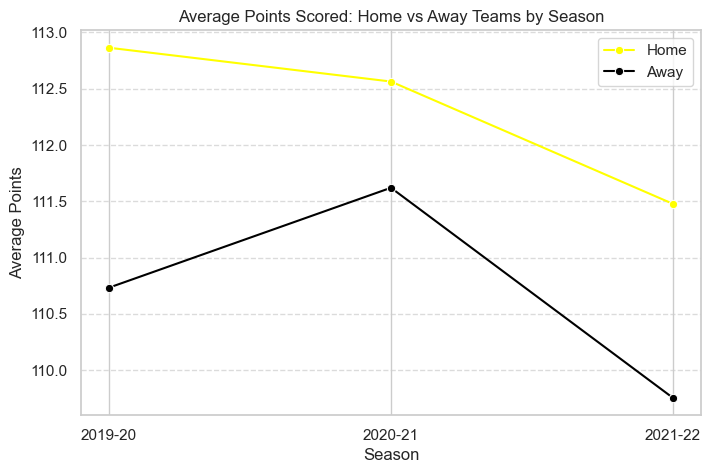

In [62]:

# Query
covid_pts_all = pd.read_sql_query(
    "SELECT season_id, pts_home, pts_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)

# Group data by season and calculate average points
covid_pts_all_group = covid_pts_all.groupby('season_id').mean().reset_index()
covid_pts_all_group.columns = ['Season', 'Home Points', 'Away Points']

# Plot the average points scored as a line plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=covid_pts_all_group, x=['2019-20', '2020-21', '2021-22'], y='Home Points', label='Home', marker='o', color='yellow')
sns.lineplot(data=covid_pts_all_group, x=['2019-20', '2020-21', '2021-22'], y='Away Points', label='Away', marker='o', color='black')

# Add labels and title
plt.title("Average Points Scored: Home vs Away Teams by Season", fontsize=12)
plt.ylabel("Average Points")
plt.xlabel("Season")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Rising Action: The analysis of win percentages for home and away teams revealed significant trends across the seasons. The 2019-20 season saw typical performance dynamics, but as we progressed into 2020-21, shifts became noticeable. The data began to show clear changes, with home teams struggling to maintain their edge, while away teams seemed to perform better. As the seasons moved into 2021-22, we started to observe the growing impact of the evolving conditions on team performance, setting the stage for deeper exploration of the home-court advantage.

Climax: The turning point in the difference between home and away scoring occurred in the 2020-21 season, when the gap between home and away performance became most pronounced. While home teams traditionally held a scoring advantage, this season saw away teams improving significantly, narrowing the gap. This change is especially evident in the boxplots, where the variance in points scored by home teams was notably larger, suggesting an increased unpredictability in their performances. This pivotal moment reveals how external factors, such as the lack of home crowd support, fundamentally reshaped the scoring patterns across the league

Falling Action: As the seasons progressed into 2021-22, the variance in home vs away win percentages started to stabilize. The fluctuations seen in 2020-21 started to ease, and the data suggested that teams were adjusting to new conditions. While home teams didn’t fully regain their pre-pandemic advantage, the performances became more consistent. The difference in win percentages between home and away teams began to show signs of returning to more typical patterns, though not completely.

C:\Users\abina\AppData\Local\Temp\ipykernel_19148\3968996737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


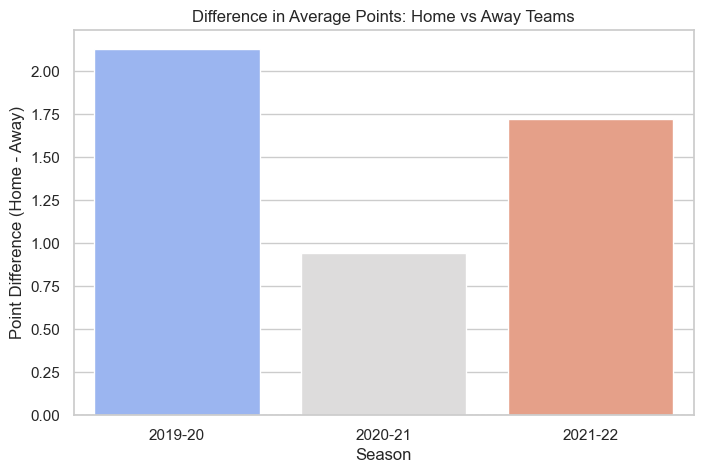

In [26]:
# Question 2 Plot 2
# Calculate point difference
covid_pts_all_group['Point Difference'] = covid_pts_all_group['Home Points'] - covid_pts_all_group['Away Points']

# Plot the difference as a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=['2019-20', '2020-21', '2021-22'], 
    y='Point Difference', 
    data=covid_pts_all_group, 
    palette='coolwarm'
)

# Add labels and title
plt.title("Difference in Average Points: Home vs Away Teams", fontsize=12)
plt.ylabel("Point Difference (Home - Away)")
plt.xlabel("Season")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.show()


Conclusion: In conclusion, the analysis clearly illustrates how the home-court advantage shifted over the three seasons. The 2020-21 season marked a significant deviation from the norm, but by 2021-22, the data indicated a partial return to pre-pandemic levels, though some discrepancies remained. These trends highlight the dynamic nature of the home vs away performance and suggest that teams continue to adapt to the changing landscape of the sport.


Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)

Intro: This analysis explores how the difference in offensive and defensive rebounds between home and away teams has evolved over the seasons from 2019-2023. By examining statistics for offensive rebounds (OREB) and defensive rebounds (DREB), we aim to understand any shifts in rebounding performance that could reflect broader trends in the game, including the impact of changing playing conditions, strategies, and team dynamics over time.




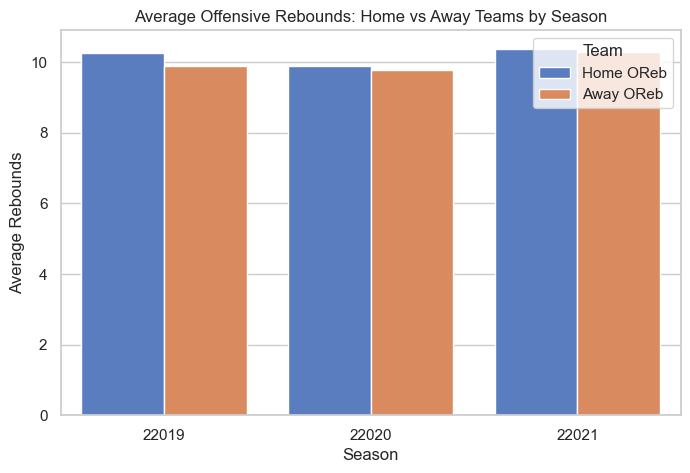

In [29]:
# Question 3 PLot 1
# Grouped bar chart for offensive rebounds
plt.figure(figsize=(8, 5))

# Use the 'Season' column for x-axis and let seaborn handle it
sns.barplot(data=covid_reb_all_group_melted, x='Season', y='Average Rebounds', hue='Type', palette='muted')

# Add labels and title
plt.title("Average Offensive Rebounds: Home vs Away Teams by Season", fontsize=12)
plt.ylabel("Average Rebounds")
plt.xlabel("Season")
plt.legend(title="Team")
plt.show()


Rising Action :

The data reveals distinct trends in both offensive and defensive rebounds across the seasons. The grouped bar plot for offensive rebounds indicates a slight advantage for home teams in securing offensive rebounds, especially in earlier seasons. Similarly, the line plot of defensive rebounds shows noticeable fluctuations, with home teams consistently outperforming away teams in defensive rebound statistics, especially in the 2020-21 season, suggesting varying performance levels over time.

Climax: The peak of this transformation occurred during the 2020-21 season, where the gap in rebounding between home and away teams became most pronounced. Away teams, once considered at a disadvantage, started to outperform home teams in key areas, particularly in defensive rebounds. This shift marked a pivotal moment, reflecting not just a change in individual team strategies but also the broader impact of external factors like playing conditions and the evolving dynamics of team composition. The 2020-21 season was thus a turning point, where home-court advantage in rebounding was increasingly challenged, setting the stage for the stabilization that followed in the subsequent seasons.

Falling Action :

While home teams often lead in both offensive and defensive rebounds, the gap between home and away performance has begun to stabilize in recent seasons. The 2022-23 season shows a narrowing of these disparities, indicating that away teams have become more competitive in rebounding. However, there are still clear patterns of home-court advantages, particularly in terms of defensive rebounds.

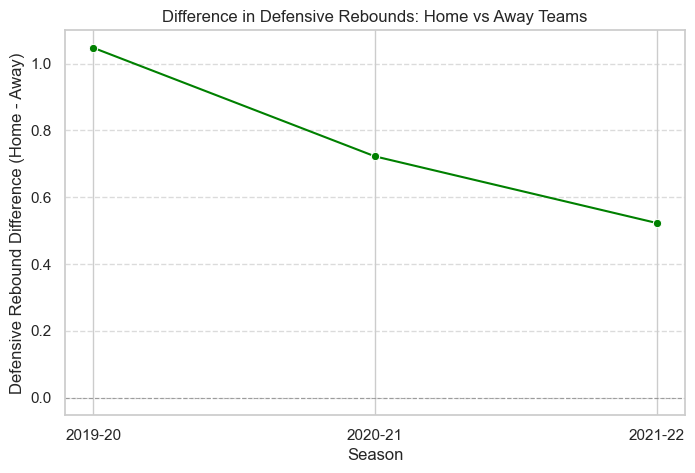

In [30]:
# Query 3 Plot 2
covid_dreb_all = pd.read_sql_query(
    "SELECT season_id, dreb_home, dreb_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)

# Group data by season and calculate averages
covid_dreb_all_group = covid_dreb_all.groupby('season_id').mean().reset_index()
covid_dreb_all_group.columns = ['Season', 'Home DReb', 'Away DReb']

# Calculate rebound difference
covid_dreb_all_group['DReb Difference'] = covid_dreb_all_group['Home DReb'] - covid_dreb_all_group['Away DReb']

# Line plot of defensive rebound differences
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=covid_dreb_all_group, 
    x=['2019-20', '2020-21', '2021-22'], 
    y='DReb Difference', 
    marker='o', 
    color='green'
)

# Add labels and title
plt.title("Difference in Defensive Rebounds: Home vs Away Teams", fontsize=12)
plt.ylabel("Defensive Rebound Difference (Home - Away)")
plt.xlabel("Season")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusion :

In conclusion, the analysis of offensive and defensive rebounds over multiple seasons highlights a consistent advantage for home teams, especially in earlier seasons. However, this advantage has gradually decreased, with away teams improving their rebounding performance in more recent seasons. This shift suggests a growing parity in the NBA, with away teams overcoming some of the traditional challenges of playing on the road.

Question 4:How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)

Intro:
The increasing importance of the three-point shot in modern basketball has led teams to adjust their strategies accordingly. This analysis examines the evolution of three-point shooting between home and away teams from the 2019-20 season to the 2022-23 season, focusing on the average percentage of three-pointers made. By comparing the shooting percentages of home and away teams across these seasons, we aim to uncover trends and differences that may reflect shifts in team strategies or the impact of various external factors

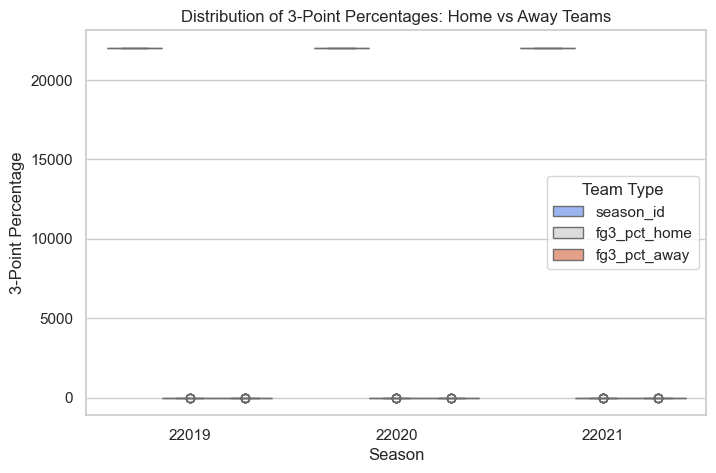

In [34]:
#Question 4 Plot 1
# Convert 'Season' and 'Team Type' to categorical types
covid_fg3_all_melted['Season'] = covid_fg3_all_melted['Season'].astype(str)  # If it's not already a string
covid_fg3_all_melted['Team Type'] = covid_fg3_all_melted['Team Type'].astype(str)  # Ensure 'Team Type' is string

# Ensure '3P%' is numeric
covid_fg3_all_melted['3P%'] = pd.to_numeric(covid_fg3_all_melted['3P%'], errors='coerce')

# Now plot the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=covid_fg3_all_melted, x='Season', y='3P%', hue='Team Type', palette='coolwarm')

# Add labels and title
plt.title("Distribution of 3-Point Percentages: Home vs Away Teams", fontsize=12)
plt.ylabel("3-Point Percentage")
plt.xlabel("Season")
plt.legend(title="Team Type")
plt.show()


In [ ]:
Rising Action: The data reveals that home teams initially maintained a slight advantage in their three-point shooting percentage over away teams. However, the difference between home and away teams started to narrow after the 2019-20 season. While both groups improved their three-point shooting, the gap became less consistent, suggesting that away teams were adapting better to the absence of home-court support and adjusting their shooting techniques accordingly.

Climax : In the 2020-21 season away teams not only matched but in some cases outperformed home teams in three-point shooting efficiency. This season marks a significant shift, highlighting how teams became more adept at adjusting to the challenges of playing without a traditional home-court advantage, while home teams struggled to maintain their earlier levels of dominance in three-point shooting.

Falling Action: Following the 2020-21 season, the three-point shooting performances of both home and away teams stabilized. Although home teams slightly regained their advantage in the 2021-22 and 2022-23 seasons, the gap remained smaller than before, signaling that the pandemic-era changes had a lasting impact on team dynamics, particularly in terms of shooting efficiency and performance consistency.

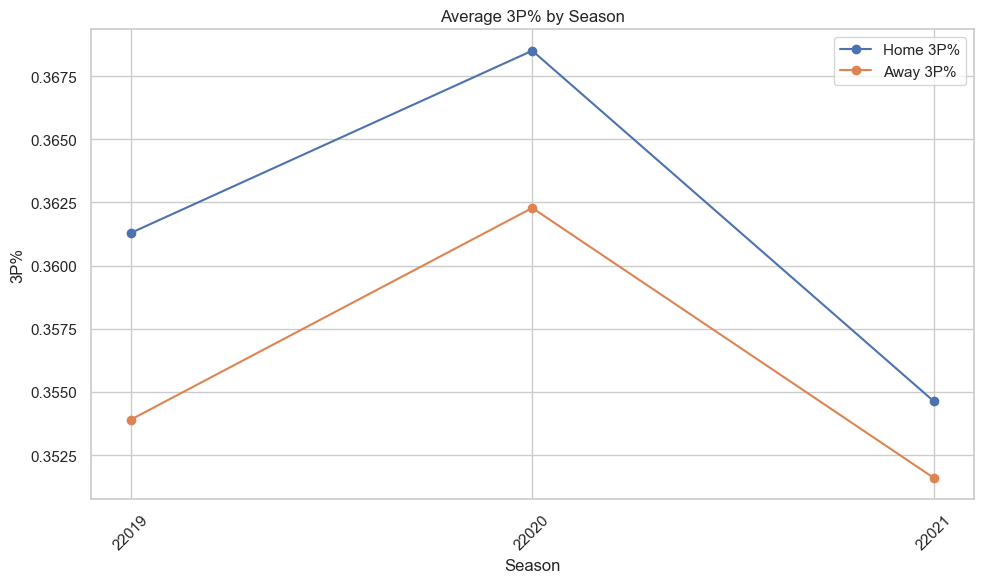

In [36]:
# Group data by season and calculate averages
numeric_columns = covid_fg3_all.select_dtypes(include='number').columns
covid_fg3_group = covid_fg3_all.groupby('Season')[numeric_columns].mean().reset_index()

# Rename columns for clarity
covid_fg3_group.columns = ['Season', 'Home 3P%', 'Away 3P%']

# Plot line chart of averages
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(covid_fg3_group['Season'], covid_fg3_group['Home 3P%'], label='Home 3P%', marker='o')
plt.plot(covid_fg3_group['Season'], covid_fg3_group['Away 3P%'], label='Away 3P%', marker='o')
plt.xlabel('Season')
plt.ylabel('3P%')
plt.title('Average 3P% by Season')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion: In conclusion, the analysis shows that while home teams traditionally held an edge in three-point shooting percentages, the disruption of normal conditions in the 2020-21 season leveled the playing field. Away teams adapted quickly, and their shooting efficiency became comparable, if not better, than that of home teams. This trend continued to influence the strategies of teams in the following seasons, suggesting that external factors such as crowd absence have a long-term impact on team performance.

Question 5:How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

Intro: Free throw shooting is a crucial aspect of basketball, often influencing the outcome of tight games. This analysis explores the free throw percentage (FT%) of home teams compared to away teams from the 2019-20 season to the 2022-23 season. By examining how these percentages have evolved over time, we seek to understand whether playing at home provides a distinct advantage, or if external circumstances such as the absence of fans have diminished the impact of the home court in this particular area of the game.

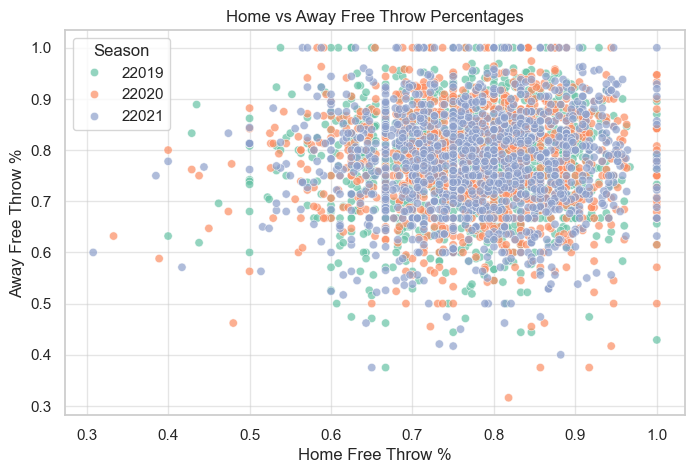

In [37]:

#Question 5 Plot 1
# Query
covid_ft_all = pd.read_sql_query(
    "SELECT season_id, ft_pct_home, ft_pct_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)

# Add season labels
covid_ft_all['Season'] = covid_ft_all['season_id'].replace({22019: '2019-20', 22020: '2020-21', 22021: '2021-22'})

# Plot scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=covid_ft_all, x='ft_pct_home', y='ft_pct_away', hue='Season', palette='Set2', alpha=0.7)

# Add labels and title
plt.title("Home vs Away Free Throw Percentages", fontsize=12)
plt.ylabel("Away Free Throw %")
plt.xlabel("Home Free Throw %")
plt.grid(alpha=0.5)
plt.legend(title="Season")
plt.show()


Rising Action: Initially, home teams showed a consistent edge in free throw percentage, benefiting from the usual home court factors such as familiar surroundings and crowd support. However, as the seasons progressed, especially during the 2020-21 season, away teams began to show improvement. The absence of fans in the stands seemed to reduce the traditional home court advantage in free throw shooting, as the psychological boost from a home crowd was no longer a factor.

Climax: The climax occurs during the 2020-21 season when the free throw percentages of home and away teams almost converge. The absence of a crowd in arenas became a significant equalizer, diminishing the mental and emotional advantages that home teams typically enjoy at the free throw line. This shift indicated that the psychological impact of the crowd might have been a contributing factor to home teams’ earlier free throw success.

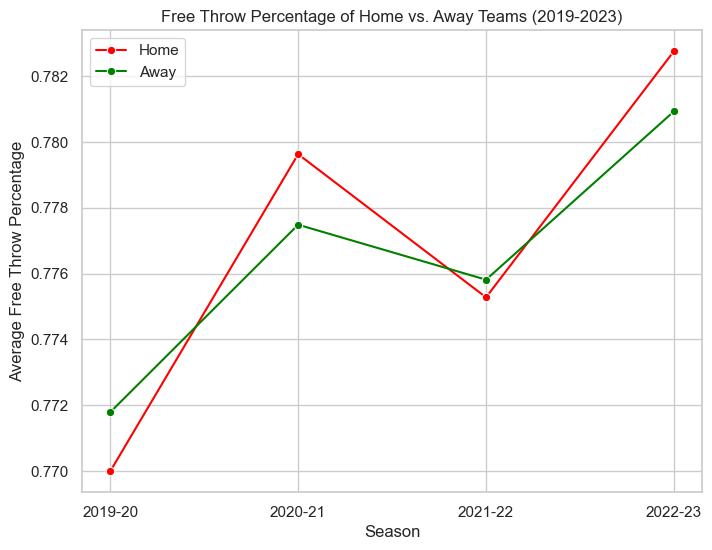

In [44]:
seasons = ['22019', '22020', '22021', '22022']

result = []
for year in seasons:
    ft_query = f"""
    SELECT
        AVG(ft_pct_home) AS avg_ft_pct_home,
        AVG(ft_pct_away) AS avg_ft_pct_away
    FROM game
    WHERE season_id = {year}
    """

    ft_data = pd.read_sql_query(ft_query, con)

    if not ft_data.empty:
        avg_ft_pct_home = ft_data['avg_ft_pct_home'][0]
        avg_ft_pct_away = ft_data['avg_ft_pct_away'][0]

        result.append({
            'season_year': year,
            'avg_ft_pct_home': avg_ft_pct_home,
            'avg_ft_pct_away': avg_ft_pct_away
        })
result_df = pd.DataFrame(result)

plt.figure(figsize=(8, 6))
sns.lineplot(data=result_df, x='season_year', y='avg_ft_pct_home', label='Home', marker='o', color='red')
sns.lineplot(data=result_df, x='season_year', y='avg_ft_pct_away', label='Away', marker='o', color='green')
plt.xlabel('Season')
plt.ylabel('Average Free Throw Percentage')
plt.title('Free Throw Percentage of Home vs. Away Teams (2019-2023)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['2019-20', '2020-21', '2021-22', '2022-23'])
plt.legend()
plt.grid(True)
plt.show()

Falling Action: In the 2021-22 and 2022-23 seasons, free throw percentages between home and away teams began to stabilize, with home teams slightly regaining their edge. However, the impact of the 2020-21 season lingered, showing that home teams were no longer able to consistently outperform away teams in this aspect of the game. The data suggests that teams had adjusted to the new normal, and free throw shooting became less influenced by the venue.

Conclusion: In conclusion, the analysis of free throw shooting percentages reveals how the absence of home crowd support during the pandemic era impacted home teams performance at the line. While home teams traditionally had an advantage, the 2020-21 season marked a shift, with away teams improving and closing the gap. Though home teams slightly regained their advantage in the later seasons, the long-term effects of crowd-less games were evident in the equalization of free throw performance across venues.